# Gestion des risques liés aux crédits bancaires

In [1]:
#Load librariesss
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
#for classification 
from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz

from keras.models import Sequential
from keras.layers import Flatten, Dense,Activation
import tensorflow as tf


In [3]:
from google.colab import files
uploaded = files.upload()

Saving Loan-applicant-details.csv to Loan-applicant-details.csv


In [4]:
import io
var_mod = ['Gender','Married','Dependents','Education','SE','AINC','CINC','LA','LAT','CH','PA','TARGET']

dataset = pd.read_csv(io.BytesIO(uploaded['Loan-applicant-details.csv']),names=var_mod)
dataset=dataset.iloc[1:,:]


In [5]:
dataset

,Gender,Married,Dependents,Education,SE,AINC,CINC,LA,LAT,CH,PA,TARGET
LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y
LP001011,Male,Yes,2,Graduate,Yes,5417,4196,267,360,1,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,Female,No,0,Graduate,No,2900,0,71,360,1,Rural,Y
LP002979,Male,Yes,3+,Graduate,No,4106,0,40,180,1,Rural,Y
LP002983,Male,Yes,1,Graduate,No,8072,240,253,360,1,Urban,Y
LP002984,Male,Yes,2,Graduate,No,7583,0,187,360,1,Urban,Y


In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in var_mod:
    dataset[i] = le.fit_transform(dataset[i])
dataset

,Gender,Married,Dependents,Education,SE,AINC,CINC,LA,LAT,CH,PA,TARGET
LP001003,1,1,1,0,0,285,35,28,5,1,0,0
LP001005,1,1,0,0,1,146,0,160,5,1,2,1
LP001006,1,1,0,1,0,108,123,20,5,1,2,1
LP001008,1,0,0,0,0,343,0,41,5,1,2,1
LP001011,1,1,2,0,1,319,187,114,5,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,0,0,0,0,0,135,0,163,5,1,0,1
LP002979,1,1,3,0,0,257,0,136,1,1,0,1
LP002983,1,1,1,0,0,383,124,108,5,1,2,1
LP002984,1,1,2,0,0,375,0,79,5,1,2,1


In [7]:
array = dataset.values
#X = array[:,[6,8]]
X = array[:,:11]
Y = array[:,11]
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=11)
x_train,x_train.shape

(array([[1, 0, 0, ..., 5, 1, 1],
        [1, 0, 0, ..., 5, 1, 2],
        [1, 1, 1, ..., 5, 1, 2],
        ...,
        [1, 1, 2, ..., 1, 1, 2],
        [1, 1, 2, ..., 5, 1, 2],
        [1, 1, 2, ..., 5, 1, 0]]), (384, 11))

In [8]:
x_train = x_train.astype('int')
y_train = y_train.astype('int')
x_test = x_test.astype('int')
y_test = y_test.astype('int')

In [9]:
model = LogisticRegression()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.7916666666666666


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [10]:
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1])

In [11]:
y_test

array([0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1])

In [12]:
cm1 = confusion_matrix(y_test,predictions)
cm1

array([[12, 17],
       [ 3, 64]])

In [13]:
model = RandomForestClassifier();
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.78125


In [14]:
cm = confusion_matrix(y_test,predictions)
cm

array([[15, 14],
       [ 7, 60]])

In [15]:
#Neighnours nb
k=3
model = KNeighborsClassifier(n_neighbors=k)
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.6145833333333334


In [16]:
cn = confusion_matrix(y_test,predictions)
cn

array([[ 9, 20],
       [17, 50]])

In [17]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred1 = model.predict(x_test)
print(accuracy_score(y_test, y_pred1))

0.6770833333333334


In [18]:
#Comparing model without properties w/ model using properties
model = DecisionTreeClassifier(criterion='entropy',max_depth=7)
#model= DecisionTreeClassifier(criterion='gini',max_depth=2,random_state=0) 
model.fit(x_train,y_train)
y_pred1 = model.predict(x_test)
print(accuracy_score(y_test, y_pred1))

0.7395833333333334


In [19]:
cn=confusion_matrix(y_test,y_pred1)
cn

array([[13, 16],
       [ 9, 58]])

In [20]:
# import libraries

from sklearn.tree import export_graphviz

from six import StringIO

from IPython.display import Image

import pydotplus

In [21]:
from graphviz import Graph, Source


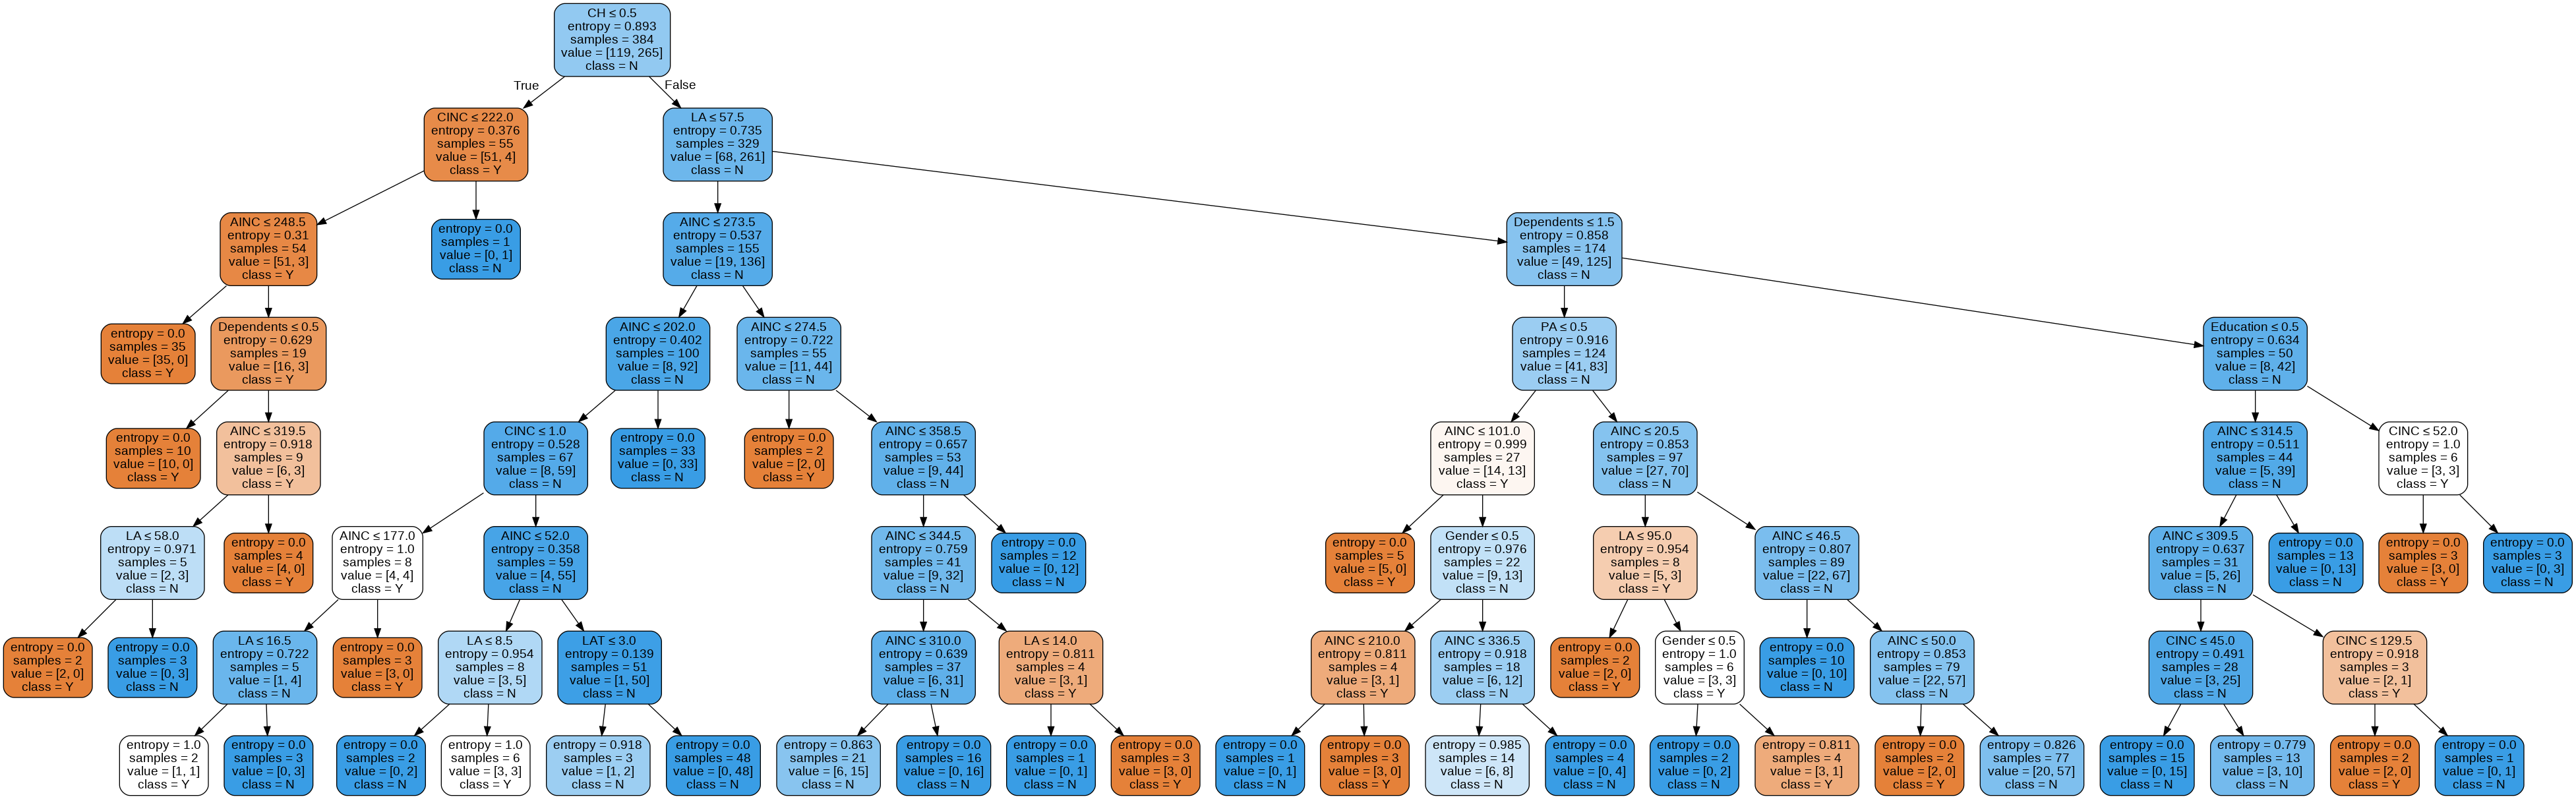

In [22]:
dot_data = StringIO()
target_names = ['Y','N']
V = ['Gender','Married','Dependents','Education','SE','AINC','CINC','LA','LAT','CH','PA']
export_graphviz(model, out_file=dot_data,
                     feature_names=V,  
                     class_names=target_names,  
                     filled=True, rounded=True,  
                     special_characters=True) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree.png')
Image(graph.create_png())

In [23]:
model = Sequential()
from keras.layers import LeakyReLU
rl = LeakyReLU(alpha=0.3)
hidden_layer=Dense(30,input_dim=11,activation=rl, bias_initializer='zeros',kernel_initializer='random_uniform',)
model.add(hidden_layer)
hidden_layer2=Dense(9,activation='tanh')
model.add(hidden_layer2)
output_layer=Dense(1,activation='sigmoid')
model.add(output_layer)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                360       
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 279       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 10        
Total params: 649
Trainable params: 649
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=1000, verbose=2)

Epoch 1/1000
12/12 - 1s - loss: 0.2363 - accuracy: 0.6458
Epoch 2/1000
12/12 - 0s - loss: 0.2162 - accuracy: 0.6927
Epoch 3/1000
12/12 - 0s - loss: 0.2146 - accuracy: 0.6979
Epoch 4/1000
12/12 - 0s - loss: 0.2114 - accuracy: 0.7005
Epoch 5/1000
12/12 - 0s - loss: 0.2097 - accuracy: 0.6901
Epoch 6/1000
12/12 - 0s - loss: 0.2103 - accuracy: 0.7031
Epoch 7/1000
12/12 - 0s - loss: 0.2141 - accuracy: 0.6875
Epoch 8/1000
12/12 - 0s - loss: 0.2092 - accuracy: 0.6979
Epoch 9/1000
12/12 - 0s - loss: 0.2132 - accuracy: 0.6797
Epoch 10/1000
12/12 - 0s - loss: 0.2072 - accuracy: 0.7083
Epoch 11/1000
12/12 - 0s - loss: 0.2082 - accuracy: 0.7083
Epoch 12/1000
12/12 - 0s - loss: 0.2062 - accuracy: 0.6927
Epoch 13/1000
12/12 - 0s - loss: 0.2072 - accuracy: 0.7031
Epoch 14/1000
12/12 - 0s - loss: 0.2048 - accuracy: 0.7083
Epoch 15/1000
12/12 - 0s - loss: 0.2059 - accuracy: 0.7031
Epoch 16/1000
12/12 - 0s - loss: 0.2063 - accuracy: 0.7057
Epoch 17/1000
12/12 - 0s - loss: 0.2039 - accuracy: 0.6979
Epoch 

In [26]:
y_pred2=model.predict(x_test).round()

cm= confusion_matrix(y_test,y_pred2)
cm

array([[15, 14],
       [ 8, 59]])

In [ ]:
cm

array([[16, 13],
       [14, 53]])